## **Objective**
This notebook is the first part of two lab assignments in which we will learn how to solve:
- **Binary classification problems** in practice (Part I).
- **Multiclass classification problems** in practice (Part II).


As we learnt in the master classes, the goal of a classification problem is to assign a class or category to every instance or sample of a data collection.

Here, we will assume that:

*   Every sample ${\bf x}$ is an $N$-dimensional vector in $\mathcal{R}^N$, where $N$ is the number of features.
*   The class $y$ of sample ${\bf x}$ is an element of a binary set $\{0,1\}$.

Then, the goal of a classifier is to predict the true value of $y$ after observing ${\bf x}$.

We will denote as $\hat{y}$ the classifier output or decision. If $y=\hat{y}$, the decision is a **hit**; otherwise it is an **error**.

First of all, it is necessary to decide which dataset will be used in the experiments. For this purpose, **Heart Attack Analysis & Prediction Dataset** is the dataset that will be employed throughout this first lab assignment. This dataset provides us with a series of risk factors for different patients (e.g., age, sex, whether the patient has chest pain, etc.) for who the chances of suffering a heart attack have been annotated. Hence, our **goal** here is to **develop a classifier** model that learns to **predict the chances of individuals** with specific ages, sex, etc., **suffering a heart attack** (binary classification).

# **Modern Theory of Detection and Estimation**
## **Lab 2. Machine Learning for Classification: Binary Classification (Part I)**
### **Academic Year 2022/2023** 

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (group 61)
*   Sound and Image Engineering (group 66)
*   Telecomunication Technologies Engineering (groups 91 and 92)
*   Telematic Engineering (group 71)

Signal Theory and Communications Department

Let's import some Python standard libraries!

In [1]:
# Common imports 
import os
import numpy as np
import pandas as pd
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt

# Figures plotted inside the notebook
%matplotlib inline 
# High quality figures
%config InlineBackend.figure_format = 'retina' 
# For fancy table Display
%load_ext google.colab.data_table

import warnings
warnings.filterwarnings("ignore")

# 1. Download the dataset

## 1.1 Description of the dataset

As previously mentioned, we will take the **Heart Attack Analysis & Prediction Dataset**, which contains information about different patients for who the chances of suffering a heart attack have been annoted. 

This dataset dates from $1988$ and consists of four datatases: Cleveland, Hungary, Switzerland and Long Beach V. The original dataset contains $76$ attributes or features, including the predicted attribute (that is, the class or category $-$or target), but all experiments refer to using a subset of $14$ of them (including the target), which are depicted below:

*   age: age of the patient
*   sex: sex of the patient
      *   $0$: Female
      *   $1$: Male
*   cp: chest pain type
      *   $1$: Typical angina
      *   $2$: Atypical angina
      *   $3$: Non-anginal angina
      *   $4$: Asymptomatic
*   trtbps: resting blood pressure (in mm Hg)
*   chol: cholestoral in mg/dl fetched via BMI sensor
*   fbs: fasting blood sugar 
      *   $0$: $>$ 120 mg/dl
      *   $1$: $<$ 120 mg/dl
*   restecg: resting electrocardiographic result
      *   $0$: Normal
      *   $1$: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of $> 0.05$ mV)
      *   $2$: showing probable or definite left ventricular hypertrophy by Estes' criteria
*   thalachh: maximum heart rate achieved
*   exng: Exercise induced angina 
      *   $0$: No
      *   $1$: Yes
*   oldpeak: ST depression induced by exercise relative to rest
*   slp: slope of the peak exercise ST segment
      *   $0$: Upsloping
      *   $1$: Flat
      *   $2$: Downsloping
*   caa: number of major vessels ($0-3$) colored by flourosopy
*   thall: thalium stress test
      *   $0$: normal
      *   $1$: fixed defect
      *   $2$: reversable defect

The "target" field refers to the chance of suffering a heart attack. It is an integer value so that:
*   $0=$ less chance of heart attack
*   $1=$ more chance of heart attack

$\underline{\text{Note}}$: The names and social security numbers of the patients were removed from the database, replaced with dummy values.



## 1.2 Getting the dataset
The first step in this assignment is to download the dataset we are going to work with. We will be using the **Heart Attack Analysis & Prediction Dataset**, which consists of a dataset for heart attack classification. This dataset is available from Kaggle, but we have already downloaded it for you in [this Drive folder](https://drive.google.com/drive/folders/1N-Gll-WhmnV4yWADcCKKNn6L6mkJu3ko?usp=share_link).

Use the link above to download the folder: 

``heart-attack-analysis-prediction-dataset`` 

and save the file in a folder in your Google Drive. Then, in the following cell, fill in the variable ``path_to_folder`` with the name of the folder in your Google Drive in which you have saved the files. Please, note that the path to your Google Drive is given by:

``
/content/drive/My Drive/
``

Hence, if you want to save the results of this lab assignment into a folder in your Google Drive, called, for example,  ``TMDE``, then the variable ``path_to_folder`` should be:

``
path_to_folder = '/content/drive/My Drive/TMDE' 
``

In [2]:
path_to_folder = '/content/drive/My Drive/TMDE'  # UPDATE THIS ACCORDING TO WHERE YOU HAVE SAVED THE DATABASE!

In [3]:
# Load the Drive helper and mount
from google.colab import drive
import os
# This will prompt for authorization.
drive.mount('/content/drive')
os.chdir(path_to_folder) 

Mounted at /content/drive


Once we have the dataset in our Google Drive, we can load it as a dataframe and inspect its first values as follows:

In [4]:
data_df = pd.read_csv('heart-attack-analysis-prediction-dataset/heart.csv')
data_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.3 Dataset analysis

Let's check how many samples and features/attributes the dataset is composed of. We'll also inspect the  number of samples per category in the target variable (``output``).

In [5]:
# How many samples are there in the dataset? Print it out!
# YOUR CODE HERE
print(data_df.shape) # rows (samples), and columns (features)
print(data_df.keys())
print(data_df.shape[0])


(303, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
303


In [6]:
# What is the number of features per sample? Print it out!
# YOUR CODE HERE
print(data_df.shape[-1])


14


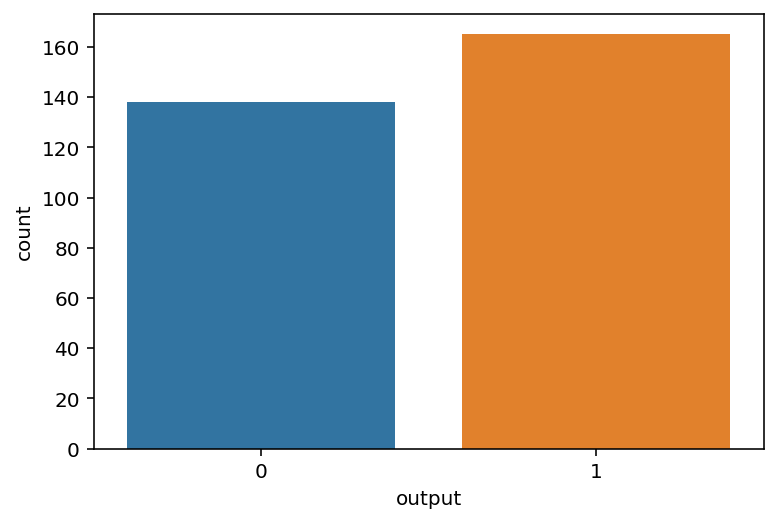

In [7]:
# Plot an histogram with the number of samples per category in the target variable
# HINT: You can use the function sns.countplot

# YOUR CODE HERE
sns.countplot(x = data_df['output']) # we printed out the labels


For now on, we are working with NumPy arrays, so let's save our data into:
*   $\mathbf{X}$ that represents the matrix of features.
*   $\mathbf{y}$ that represents a 1D array containing the target variable.



In [8]:
# Save the features in a matrix X and the output in an array y
# YOUR CODE HERE
X = data_df.loc[:, data_df.columns != 'output'].to_numpy()
print(X.shape)
y = data_df['output'].to_numpy()
print(y.shape)


(303, 13)
(303,)


## 1.4 Separation in training and test set

As it was explained in the previous laboratory assignment, splitting the dataset is essential for an unbiased evaluation of prediction performance. In most cases, it is enough to split the dataset randomly into two subsets:
*   The **training set** is applied to train, or **fit**, the model. For example, it can be used to find the optimal weights, or coefficients, for linear regression, logistic regression, etc.
*   The **test set** is needed for an unbiased evaluation of the final model. It should not be used for fitting or validation tasks.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you!

For simplicity, use the names `X_train, X_test, y_train, y_test` for the corresponding NumPy arrays. Use $70$\% samples for the training set and the remaining for the test set.

**Note:** When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this can be reached by setting the `random_state` to a specific integer value. In order to work with the same dataset as your colleagues, please use `random_state = 42` as the seed to split your data.

In [9]:
# YOUR CODE HERE
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
# 303 rows, 13 columns
print("X_train sample:", X_train.shape) # 70/100 = 212 samples
print("X_test:", X_test.shape) # 30/100 = 91 samples
# 303 rows, 1 column
print("y_train sample:", y_train.shape) # 70/100 = 212 samples (1 column: labels (the output))
print("y_test:", y_test.shape) # 30/100 = 91 samples


X_train sample: (212, 13)
X_test: (91, 13)
y_train sample: (212,)
y_test: (91,)


## 1.5. Scaling the inputs

As mentioned in the previous laboratory assignment, the features or attributes of the dataset can have a wide range of different values, that is, for the dataset at hand, $\text{F}_1 \in [0,3]$ whereas, $\text{F}_2 \in [71,202]$. This can lead to some problems with specific classifiers which might lead to sub-optimal solutions. For this reason, a common pre-processing technique used in machine learning is scaling the input variables so that all end up having values in comparable ranges. This can significantly improve the performance of the classification algorithms!

The most used scaling technique within the machine learning community is the **standardization**. This is a linear transformation that leaves each variable with $0$ mean and unit variance. In short, the idea is to transform every variable (or feature) in every sample by subtracting its mean and dividing by its standard deviation ($\sigma$), i.e. if $\mathbf{X}$ is one-dimensional, then:

$$\mathbf{X}_{\text{s}} = \frac{\mathbf{X} - \text{E}[\mathbf{X}]}{\sigma}$$


Please note that we seek to apply standardization to the training dataset to get it to have a similar range of variation among its different features aiming towards ​​improving the conditioning of the data matrix, which results in fewer numerical problems of the classification algorithm or of convergence of the iterative algorithms. Once we have standardized the training data, we need to transform the test data in the same way, i.e., as a function of the training dataset statistics, since otherwise, their respective samples will not be comparable.



The module  [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), included in the library `scikit-learn`, can perform this job for you! 


**Your task here is to standardize the data. For this purpose, in the next cell, perform the following operations.**
- Create an instance of `StandardScaler`
- Fit the scaler with the <ins>training</ins> data
- Create two new arrays:
  - `X_train_s`: It contains the result of transforming `X_train` with the scaler
  - `X_test_s`: It contains the result of transforming `X_test` with the (same) scaler

In [10]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit(X_train) # we only fit the training values

# transform to normalize all values of X (train and test)
X_train_s = sscaler.transform(X_train)
X_test_s = sscaler.transform(X_test)

# WE NEVER NORMALIZE THE TARGET bc there is only 1 column

# Standardized sets (same dimensions, with values between [-1,1])
print(X_train_s.shape)
print(X_test_s.shape)


(212, 13)
(91, 13)


# 2. Classifiers

Once we have our data ready, let us analyze the performance obtained with different classifiers on predicting the chances of suffering a heart attack. In particular, we will experiment with the following two **parametric classifiers**:

*   Logistic Regression
*   Linear Discriminant Analysis

and this **non-parametric classifier**:

*   $k$-Nearest Neighbors ($k$-NN)


## 2.1 Hyperparameter selection via cross-validation


The performance of most of the machine learning algorithms depends strongly on the selected values for the hyperparameters. 

If you remember from the previous laboratory assignment, the original dataset was divided into three subsets: **train, test, and validation**, while in this assignment, the dataset has been divided into two subsets: **train and test**. The basically idea behind this is that in the former assignment, we carried out an approximation of the common way of finding values for these hyperparameters: **cross-validation**.

Cross validation is a commonly used procedure in machine learning to simulate the effect of training a model with a set of data and evaluate its generalization capabilities as the performance in a **separate dataset**. 

  The cross validation process involves the following steps:

  - Randomly partition the training dataset in $N$ disjoint subsets of similar sizes. Each of this subsets is called **fold** in machine learning terminology. Hence, the term **$N$-fold cross validation**.

  - Let us suppose we have chosen $N=3$ folds. This means the training data $(X_{\text{train}}, Y_{\text{train}})$ has been split in three subsets: $(X_1, Y_1)$, $(X_2, Y_2)$ and $(X_3, Y_3)$, so that $(X_1, Y_1) \cup (X_2, Y_2) \cup (X_3, Y_3) = (X_{\text{train}}, Y_{\text{train}})$.

  - Create an instance of the model with the corresponding hyperparameters. The cross validation follows with the execution of the following loop:

      For $n=1,2,\dots,N$ iterations:  
      1. Choose $(X_n,Y_n)$ as **validation set** for iteration $n$
      2. Prepare a **training set** for iteration $n$ joining the rest of the subsets (excluding the validation set)
      3. Fit the model instance with the training set of step 2
      4. Evaluate  the model instance (method `score`) with the validation set of step 1
      5. Keep the *score* achieved in the $n$ iteration

  - Once the loop is finished, we have $N$ scores, each corresponding to the evaluation of the model fitted in each iteration with the corresponding validation set.
  - Estimate the **real score** that an instance of the model fitted using all the data would yield in a separate dataset computing the **mean** and **standard deviation** of the $N$ validation scores.

  Typical values for the number of folds include $N\in \{3, 5, 10\}$. For the results obtained in this assignment, use the default $5$-fold cross validation.

The question here is: How is cross-validation carried out in `scikit-learn`? The answer to this question is by using the class [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). This class carries out an exhaustive search over specified parameter values for an estimator (or classifier). Aiming at understing how it works, it is necessary to briefly explain some concetps:

*   **Grids of hyperparameters**:

      This method consists in to form a **grid** with a number of dimensions equal to the number of hyperparameters that need to be optimized. The size of each dimension of the grid is equal to the number of values in the range of the corresponding hyperparameter. Notice that this method explores **discrete** ranges for each hyperparameter.

      In models that depend on a larger number of hyperparameters, it is necessary to be careful with the granularity of the ranges as the combinatorial explosion of the size of the grid can be hard to manage.


  
 
*   **Cross-validation to explore the grid**:

  The grid is explored by a loop that visits all its nodes that runs a cross validation. The process details are the following:

  For each node of the grid:  
  1. Create an instance of the model with the hyperparameters set to the values that define that node of the grid
  2. Run a **cross validation** to estimate the test performance that the model would yield if it were fitted using the values for hyperparameter that correspond to that node. 
  3. Store the cross validation score for that node of the grid.

  Once all the nodes of the grid have been cross validated, the procedure outputs the combination of hyperparameters that achieved the best performance in cross validation. 

 

Before using `GridSearchCV`, let's have a look at the most important parameters it includes:

*   `estimator`: The model on which we want to use `GridSearchCV`. For instance, a classifier such as `sklearn.neighbors.KNeighborsClassifier`.
*   ``param_grid``: The parameter space is given as a dictionary with parameter names (`str`) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.


* ``scoring``: Evaluation metric used to assess the performance of the cross-validated model on the test set.
 By default, the score function of the estimator is utilized, i.e., the `sklearn.metrics.accuracy_score` for classification and `sklearn.metrics.r2_score` for regression tasks.
*  ``cv``: Number of splits needed for cross-validation. By default, this parameter is set to $5$.

## 2.2 Logistic regression

### 2.2.1 Baseline

Aiming at implementing a logistic regressor classifier in Python, we will use the class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  included in `scikit-Learn`, which consists of a **regularized logistic regression**. 

This means that, to the loss function of the logistic regressor explained in the master class, a penalty term is added based on either L1, L2 or Elastic-Net regularization. Please note that:

*   **L1 regularization:** It adds an L1 penalty equal to the absolute value of the magnitude of coefficients. For example, Lasso regression model implements this method. 
*   **L2 regularization:** It adds  an L2 penalty which is equal to the square of the magnitude of coefficients. For example, Ridge or Kernel Ridge regression models implement this method.
*   **Elastic Net:** Both L1 and L2 penalty terms are added. This kind of regularization is not explored in this assignment.

We can also choose to not apply any regularization by setting the parameter `penalty` to `none`.

The regularization strength  is controlled by the parameter  `C`. It is defined as the inverse of regularization strength and it must be a positive float. Smaller values specify stronger regularization.

**Your task here is:**

*   Train with standardized features a logistic regressor model (with default parameters).
*   Calculate the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.

In [11]:
# IGNORE: maybe use solver='newton-cg' as parameter in LogisticRegression
#YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression().fit(X_train_s, y_train)
accuracy_LR_train = logistic_r.score(X_train_s, y_train)
accuracy_LR_test = logistic_r.score(X_test_s, y_test)

print("LR Train accuracy (without fine-tuning hypeparameters): %.2f%%" % (accuracy_LR_train*100))
print("LR Test accuracy (without fine-tuning hypeparameters): %.2f%%" % (accuracy_LR_test*100))


LR Train accuracy (without fine-tuning hypeparameters): 87.26%
LR Test accuracy (without fine-tuning hypeparameters): 81.32%


### 2.2.2 Tuning the hyperparameters

In this section, it will be carried out hyperparameters optimization. The hyperparameters that will be explored before fitting the logistic regressor in this assignment will be: the parameter `penalty` and the value of `C`. Do a grid search to find out which are the best values for the aforementioned hyperparameters.

**Your task here is:**

*   Find the optimal value of `C` and `penalty`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `C` $\in$ $[0.001,0.01,0.1,0.2,0.3,0.5,1,10,100]$
 - `penalty` $\in$ {`L1`, `L2`}. 
*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.






In [12]:
# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1','l2'), 'C':[0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 10, 100]}
grid_LR = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters)
grid_LR.fit(X_train_s, y_train);

print("Results from GridSearchCV")
print("The best parameters across all searched parameters are:", grid_LR.best_params_) # _scde(X_test_s, y_test)
#grid_LR.best_estimator_


Results from GridSearchCV
The best parameters across all searched parameters are: {'C': 0.1, 'penalty': 'l2'}


In [13]:
# YOUR CODE HERE

best_score_LR = grid_LR.score(X_test_s, y_test)
print(round(best_score_LR*100, 2))


82.42


Do you think that the fact of fine-tuning the hyperparameters improves the classification performance? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

## 2.3 Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a generalization of Fisher's linear discriminant. Put very simply, this method projects the data points onto new axes such that these new components maximize the separability among categories while keeping the variation within each of the categories at a minimum value. The resulting combination may be used as a linear classifier, or more commonly, for dimensionality reduction before later classification.


The `scikit-Learn` [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) can do this work for you! In this case, it is not necessary hyperparameters tuning. We will train a LDA classifier with its default values.

**Your task here is:**

*   Train with standardized features a LDA model (with default parameters).
*   Calculate the accuracy rate using the test set and print it out (use the method `score` for this purpose)! Please, round off the numbers to $2$ decimal places.


In [14]:
#Training the model
#YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# we create the model always with th training values
lda = LinearDiscriminantAnalysis().fit(X_train_s, y_train)


In [15]:
#Testing the model
#YOUR CODE HERE

best_lda = lda.score(X_test_s, y_test) # we score with the test always
print(round(best_lda*100, 2))


80.22


Having a look at the train accuracy, it is easy to observe that the problem is not perfectly linearly separable, but let us check it graphically (for the training set). Project each standardized training sample onto one axis (`n_components=1` in LDA model) and represent it (indicating its category or class).




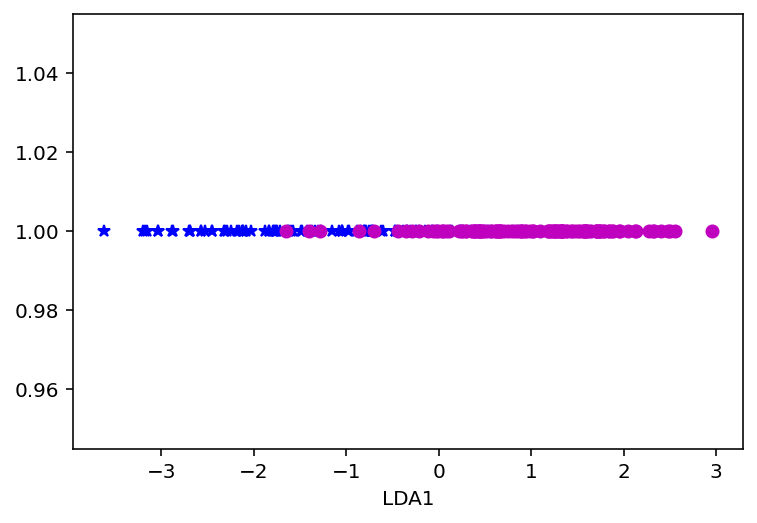

In [16]:
#YOUR CODE HERE
lda_D1 = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_D1.fit_transform(X_train_s, y_train)

plt.xlabel('LDA1')
X_lda_clase_0 = X_lda[y_train==0,0]
X_lda_clase_1 = X_lda[y_train==1,0]

y0 = np.ones((X_lda_clase_0.shape[0], 1))
y1 = np.ones((X_lda_clase_1.shape[0], 1))

plt.plot(X_lda_clase_0, y0, '*b')
plt.plot(X_lda_clase_1, y1, 'om')

plt.show()


Why is not linearly separable?

<font color = 'green'> YOUR ANSWER HERE

<font color = 'black'> It is not super precise, there is some Pfa

## 2.4 $k$-NN classifier

Finally, we will explore the $k$-Nearest Neighbours ($k$-NN) algorithm. This is, by far, one of the easiest non-parametric machine learning models to understand. 

The discriminant function for $k$-NN is constructed in an algorithmic way. For every observation $\mathbf{x}_{\text{test}}$ that needs to be classified with $k$-NN, the following steps are carried out (once the appropriate number of neighbours $-$$k$$-$ has been selected):

1. Compute the (Euclidean) distance between $\mathbf{x}_{\text{test}}$ and all the observations in the
training set.
2. Sort these distances in ascending order.
3. Find the training observations that occupy the first $k$ positions in the
ranking of distances to $\mathbf{x}_{\text{test}}$. Let’s denote by $\mathcal{I}_k = \{i_1, i_2,\ldots, i_k\}$ the indices
of these training observations in the training set.
4. Retrieve the true targets of the $k$-NN: ${y_{i_1},y_{i_2},\ldots,y_{i_k}}$.
5. $\widehat{y}_{\text{test}}$ = mode
$\{y_{i_1},y_{i_2},\ldots,y_{i_k}\}$.

The last step can be modified replacing the mode by a voting, where each
neighbor $\mathbf{x}_{i_{j}}$ votes for its class with its vote inversely proportional to the
distance between $\mathbf{x}_{i_{j}}$ 
and $\mathbf{x}_{\text{test}}$.



So easy, isn't it? We are ready to implement our $k$-NN algorithm!

Here we will implement a $k$-NN algorithm by fine-tuning its two main hyperparameters:

*   `n_neighbors`: Number of neighbors to be used in the experiments (that is, the value of $k$).
*   `weights`: Weight function used in prediction. In this assignment, it can take two possible values:
  *   `uniform`: uniform weights. All samples in each neighborhood are weighted equally.
  *   `distance`: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

The `scikit-Learn` [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) can do this work for you!

**Your task here is:**

*   Find the optimal value of `n_neighbors` (that is, the value of $k$) and `weights`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `n_neighbors` $\in$ $[1, 2, 3,\ldots,9, 10]$
 - `weights` $\in$ {`uniform`, `distance`}
*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.

In [17]:
#Fine-tuning hyperparameters
#YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

K = np.arange(1, 11, 1) # np.arange([start, end), step) ---> prints: [1  2  3  4  5  6  7  8  9 10]
print('K np vector is:',K)
parameters = {'weights':('uniform', 'distance'), 'n_neighbors': K}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, cv = 4).fit(X_train_s, y_train)

print("Results from GridSearchCV")
print("The best parameters across all searched parameters are:", grid_KNN.best_params_)


K np vector is: [ 1  2  3  4  5  6  7  8  9 10]
Results from GridSearchCV
The best parameters across all searched parameters are: {'n_neighbors': 3, 'weights': 'uniform'}


Which are the best hyperparameters that you have obtained?

<font color = 'green'> YOUR ANSWER HERE

In [18]:
#Testing the model
#YOUR CODE HERE

score_grid_KNN = grid_KNN.score(X_test_s, y_test)

print(round(score_grid_KNN*100, 2),'%')


83.52 %


According to the results that you have obtained, what is the best classifier for this classification task? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE
<font color = 'black'> 

# 3. Other classification performance metrics: ROC and AUC

In this last section, two different metrics commonly used for binary classification problems will be explored.

The **Receiver Operating Characteristic** (ROC) curve is a graphical plot used for binary classification that shows the relation between the probability of detection ($P_{\text{D}}$) versus
the probability of false alarm ($P_{\text{FA}}$) , for different decision thresholds. This means that each point in the curve corresponds to a work point.

The ROC curve is then determined by calculating the probability of detection of each data observation and using different values of thresholds to obtain the labels.
Furthermore, to obtain a performance metric similar to accuracy, it is possible to compute the Area Under the Curve (AUC) metric, which determines what is the total area under the ROC curve.

Once again, there is a function available in `scikit-learn` to calculate the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and another to calculate the [`auc`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc). 

$\underline{\text{Hint}}$: Please note that the parameter `y_score` required in `roc_curve` represents the probability estimates of the positive class. In binary classification case, the method `predict_proba` returns probability estimates. In particular, it predicts the probabibility for a sample to be negative and positive, and the second column shows how much probability of this sample belongs to positive class. When passing only positive probability, ROC evaluates on different thresholds and checks if given probability $>$ threshold (say $0.5$), it belongs to positive class otherwise it belongs to negative class. 






In [20]:
# Plot the ROC curve and calculate the AUC for the LR classifier.
#YOUR CODE HERE
#from sklearn.metrics import roc_curve, auc
from sklearn import metrics
# fpr_LR, tpr_LR, thresholds = roc_curve(y_test, grid_LR.best_estimator_.predict_proba(X_test_s)[:,1])
# roc_auc_LR = auc(fpr_LR, tpr_LR)
# plt.plot(fpr_LR, tpr_LR, color="purple", lw=2, label="ROC curve LR (area = %0.3f)" % roc_auc_LR)

# fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, grid_LR.best_estimator_.predict_proba(X_test_s)[:,1]) #probabiblidad de que la muestra pertenezca a 1 o 0
# roc_auc_LR = auc(fpr_knn, tpr_knn)
# print(roc_auc_LR)
# plt.plot(tpr_knn,fpr_knn, label='KNN')
# plt.ylabel('False Positive Rate')
# plt.xlabel('True Positive Rate')


# Plot the ROC curve and calculate the AUC for the LR classifier.
#YOUR CODE HERE
from sklearn import metrics
fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, grid_LR.best_estimator_.predict_proba(X_test_s)[:,1])
roc_auc_LR = metrics.auc(fpr_LR, tpr_LR)
# plt.plot(fpr_LR, tpr_LR, color="purple", lw=2, label="ROC curve LR (area = %0.3f)" % roc_auc_LR)